In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 25.1010088787773, 1.24409000000000*1e5, 2315.232926/3600, "R10")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.9000000000000, 1.19677000000000*1e5, cold1_In.M, "R11")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 45.1618428113932, 7.79700000000000*1e5, 32188.9835638830/3600, "R21")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.0674656717429, 7.69921000000000*1e5, cold2_In.M, "R21a")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 19.6181822000000*1e5, 5208/3600, "F05")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F05 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.00, 19.55495900*1e5, mainH2_In.M, "F06")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.000, 29.5224300000000*1e5, 18977.31906/3600, "R04a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.400, 29.4399500000000*1e5, hot_In.M, "R05")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R10
M [kg/s]    =  0.6431
P [bar]     =  1.244
T [Kelvin]  =  25.1
H [kJ/kg]   =  499.637
S [kJ/kg.K] =  23.5


Stream R11
M [kg/s]    =  0.6431
P [bar]     =  1.197
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.331
S [kJ/kg.K] =  34.931


Stream R21
M [kg/s]    =  8.9414
P [bar]     =  7.797
T [Kelvin]  =  45.16
H [kJ/kg]   =  676.013
S [kJ/kg.K] =  21.701


Stream R21a
M [kg/s]    =  8.9414
P [bar]     =  7.699
T [Kelvin]  =  70.07
H [kJ/kg]   =  959.998
S [kJ/kg.K] =  26.775


HOT STREAMS(from ASPEN HYSYS)
F05 p-H2 mole fraction: 0.528
Stream F05
M [kg/s]    =  1.4467
P [bar]     =  19.618
T [Kelvin]  =  73.5
H [kJ/kg]   =  1294.929
S [kJ/kg.K] =  30.18


Stream F06
M [kg/s]    =  1.4467
P [bar]     =  19.555
T [Kelvin]  =  46.0
H [kJ/kg]   =  730.932
S [kJ/kg.K] =  20.457


Stream R04a
M [kg/s]    =  5.2715
P [bar]     =  29.522
T [Kelvin]  =  74.0
H [kJ/kg]   =  947.817
S [kJ/kg.K] =  21.242


Stream R05
M [kg/s]    =  5.2715
P [bar]     =  29.44
T [

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R21A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R21B")
cold2B_In.printState()

Stream R21A
M [kg/s]    =  6.0683
P [bar]     =  7.797
T [Kelvin]  =  45.16
H [kJ/kg]   =  676.013
S [kJ/kg.K] =  21.701


Stream R21B
M [kg/s]    =  2.8731
P [bar]     =  7.797
T [Kelvin]  =  45.16
H [kJ/kg]   =  676.013
S [kJ/kg.K] =  21.701




In [4]:
lengthPFHX = 4.0669
widthPFHX = 1.5000
heightPFHX = 1.4021
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 3.1978
widthHXA      = 1.5000
heightHXA     = 0.9341
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  4.0669
Width  [m]  =  1.5
Height [m]  =  1.4021
Volume [m3] =  8.553


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  3.1978
Width  [m]  =  1.5
Height [m]  =  0.9341
Volume [m3] =  4.481


HXB Geometry
Length [m]  =  4.0669
Width  [m]  =  1.5
Height [m]  =  0.668
Volume [m3] =  4.073




HX-B Geometry
Length [m]  =  4.0669
Width  [m]  =  1.5
Height [m]  =  0.668
Volume [m3] =  4.073

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.92e-04       0.00e+00          50              1       
       2          1.77e-04       0.00e+00          51              1       
       3          1.99e-04       0.00e+00          52              1       
       4          2.01e-04       0.00e+00          53              1       
       5          2.01e-04       0.00e+00          54              1       
       6          5.14e-05       0.00e+00          55              0       
Solved in 6 iterations, number of nodes 55. 
Maximum relative residual: 5.14e-05 
Maximum boundary residual: 0.00e+00


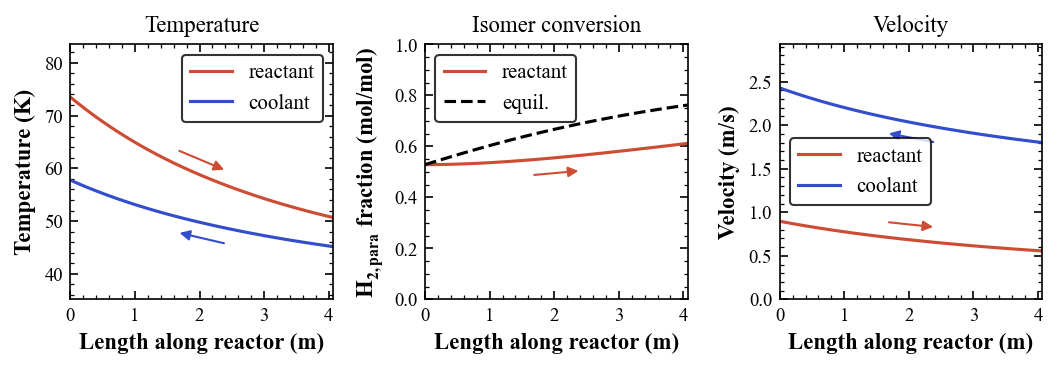

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

Final HX-5 Geometry
Length [m]  =  7.7
Width  [m]  =  1.5
Height [m]  =  2.9
Volume [m3] =  33.495


HX-B Geometry
Length [m]  =  7.7
Width  [m]  =  1.5
Height [m]  =  2.512
Volume [m3] =  29.014

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.15e-02       0.00e+00          50             57       
       2          1.23e-04       0.00e+00          107             1       
       3          8.08e-05       0.00e+00          108             0       
Solved in 3 iterations, number of nodes 108. 
Maximum relative residual: 8.08e-05 
Maximum boundary residual: 0.00e+00


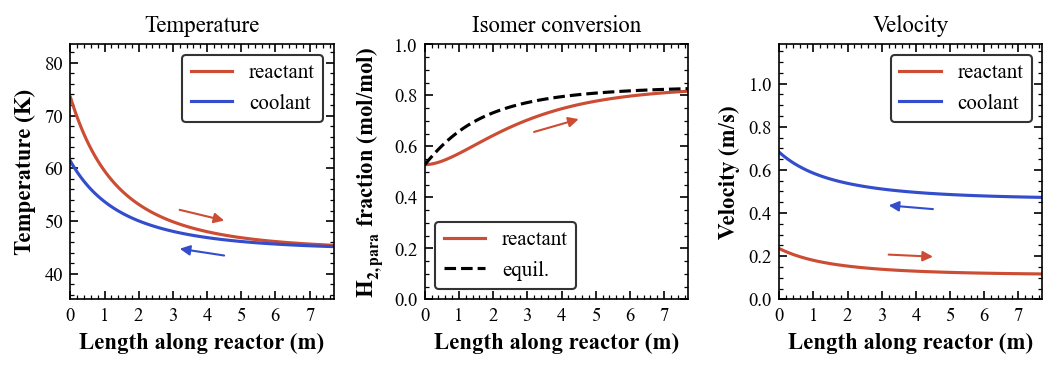

In [10]:
#Adjusted geometry
lengthPFHX = 7.700
widthPFHX  = 1.500
heightPFHX = 2.900
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "HYDROGEN",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4,  # tonne-per-day
        'temperature':  cold2B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-5 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [9]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1961.818220              779.356305   
1    0.078571              1961.714905              779.361019   
2    0.157143              1961.613881              779.365661   
3    0.235714              1961.515025              779.370235   
4    0.314286              1961.418222              779.374744   
..        ...                      ...                     ...   
107  7.385714              1955.704318              779.687550   
108  7.464286              1955.652345              779.690666   
109  7.542857              1955.600451              779.693780   
110  7.621429              1955.548635              779.696891   
111  7.700000              1955.496895              779.700000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                   73.500000                61.248869   
1                   72.163718                60.520239   
2                   70.902393    